# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [3]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

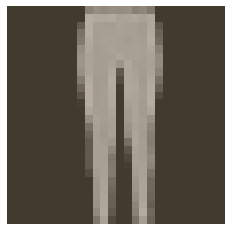

In [15]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);
image = image.view(image.shape[0], -1)

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [24]:
from torch import nn
from torchsummary import summary
from torch import optim

In [28]:
# TODO: Define your network architecture here

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 32),
                     nn.ReLU(),
                     nn.Linear(32, 10),
                     nn.LogSoftmax(dim=1))

# print the structure of the network model
print("This is the structure of the network model: ")
print(summary(model, (64, 784)))

This is the structure of the network model: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 64, 128]         100,480
              ReLU-2              [-1, 64, 128]               0
            Linear-3               [-1, 64, 64]           8,256
              ReLU-4               [-1, 64, 64]               0
            Linear-5               [-1, 64, 32]           2,080
              ReLU-6               [-1, 64, 32]               0
            Linear-7               [-1, 64, 10]             330
        LogSoftmax-8               [-1, 64, 10]               0
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.23
Params size (MB): 0.42
Estimated Total Size (MB): 0.84
--------------------------------------------------------------

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [29]:
# TODO: Create the network, define the criterion and optimizer

# define the loss as negative log likelihood loss
criterion = nn.NLLLoss()

# define the optimizer as Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [43]:
# TODO: Train the network here

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        loss = criterion(model(images), labels)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.1778555373186623
Training loss: 0.17042815377876194
Training loss: 0.16636869758526399
Training loss: 0.16161742708933696
Training loss: 0.15756938465511494
Training loss: 0.15339852623871839
Training loss: 0.15292180878624542
Training loss: 0.14326165168524296
Training loss: 0.1415944450568638
Training loss: 0.13523041612422987
Training loss: 0.1367203448918948
Training loss: 0.1299126639958225
Training loss: 0.12542215877099397
Training loss: 0.12561656319415138
Training loss: 0.126280152463793
Training loss: 0.11696050052187526
Training loss: 0.11669711407913423
Training loss: 0.11468850194649306
Training loss: 0.10861834485643804
Training loss: 0.10497853626558648


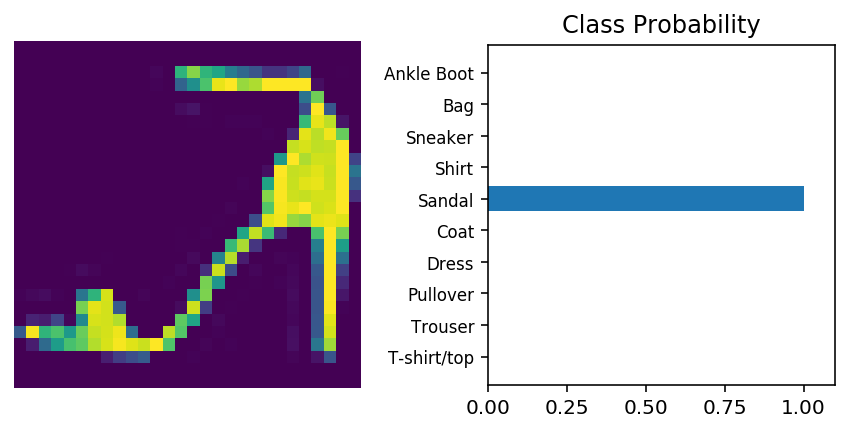

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')